In [101]:
from sklearn.datasets import load_boston
data = load_boston()
X, y = data['data'], data['target']

In [102]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [103]:
y[1]

21.6

In [104]:
len(X[:, 0])

506

In [105]:
%matplotlib inline

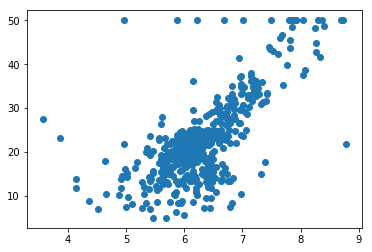

In [106]:
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
draw_rm_and_price()    

In [107]:
import random
def price(rm, k, b):
    """f(x) = k*rm + b"""
    return k*rm + b

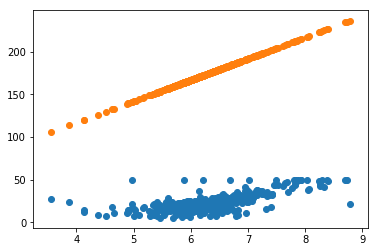

In [108]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

### 损失函数为  $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$

### 通过求导来确定变化方向

In [129]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

### 损失函数为 $ loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$ 
### 通过求导来确定变化方向

In [133]:
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))


def partial_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def partial_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

In [134]:
best_k = 0
best_b = 0

In [139]:
import numpy as np
trying_times = 10000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 8e-04


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k = current_k
        best_b = current_b
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient = partial_k(X_rm, y, price_by_k_and_b)
    
    b_gradient = partial_b(y, price_by_k_and_b)
    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate

print('End !')

When time is : 0, get best_k: 31.203715863182566 best_b: -43.952594536597964, and the loss is: 129.61854486620263
When time is : 50, get best_k: 25.860717199497717 best_b: -43.99259453659787, and the loss is: 95.99975173283441
When time is : 100, get best_k: 21.69806906615553 best_b: -44.03259453659778, and the loss is: 69.79903013158646
When time is : 150, get best_k: 18.455322949085325 best_b: -44.07248702671627, and the loss is: 49.412085283786915
When time is : 200, get best_k: 15.92949110900083 best_b: -44.112072797467185, and the loss is: 33.60856910004156
When time is : 250, get best_k: 13.962373748553519 best_b: -44.15132971446318, and the loss is: 21.382474753152483
When time is : 300, get best_k: 12.430669762254862 best_b: -44.18963801485844, and the loss is: 12.049841304328528
When time is : 350, get best_k: 11.238227625994956 best_b: -44.22301667098495, and the loss is: 5.670438984421269
End !


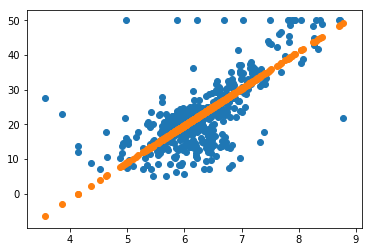

In [140]:
X_rm = X[:, 5]
k = best_k
b = best_b
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)